# **1.Getting setup**



In [282]:
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np

In [283]:
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


In [284]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# **2.Getting a dataset**

In [285]:
root_dataset='./input_dataset'
mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std),
                                transforms.RandomVerticalFlip(p=0.5),
                              ])
train_data=torchvision.datasets.FashionMNIST(root=root_dataset,download=True,train=True,transform=transform)
test_data=torchvision.datasets.FashionMNIST(root=root_dataset,download=True,train=False,transform=transform)

# **3. visualizing sample of data**

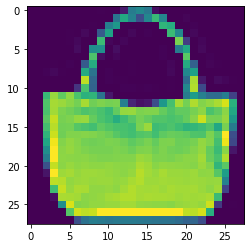

In [286]:
img1=train_data[100][0][0]
plt.imshow(img1)

In [287]:
train_images=train_data.data
train_targets=train_data.targets

In [288]:
print("Train Images shape",train_images.shape)
print("Train Images size",train_images.size())
print("Tragets shape",train_targets.shape)
print("Numeric value of unique classes",train_targets.unique())
print("Name of classes",train_data.classes)

Train Images shape torch.Size([60000, 28, 28])
Train Images size torch.Size([60000, 28, 28])
Tragets shape torch.Size([60000])
Numeric value of unique classes tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Name of classes ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


torch.Size([28, 28])


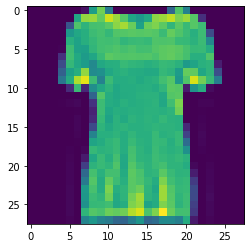

In [289]:
img=train_images[10]
print(img.size())
plt.imshow(img)

torch.Size([1, 28, 28])


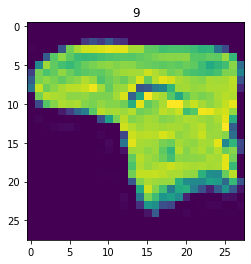

In [290]:
img,label=train_data[0]
print(img.size())
plt.imshow(img.squeeze())
plt.title(label);

label_x_rows  [    1     2     4 ... 59974 59985 59998]
label_x_rows  [   16    21    38 ... 59989 59991 59996]
label_x_rows  [    5     7    27 ... 59977 59981 59993]
label_x_rows  [    3    20    25 ... 59971 59980 59997]
label_x_rows  [   19    22    24 ... 59984 59986 59990]
label_x_rows  [    8     9    12 ... 59983 59995 59999]
label_x_rows  [   18    32    33 ... 59973 59987 59988]
label_x_rows  [    6    14    41 ... 59951 59979 59992]
label_x_rows  [   23    35    57 ... 59962 59967 59994]
label_x_rows  [    0    11    15 ... 59932 59970 59978]


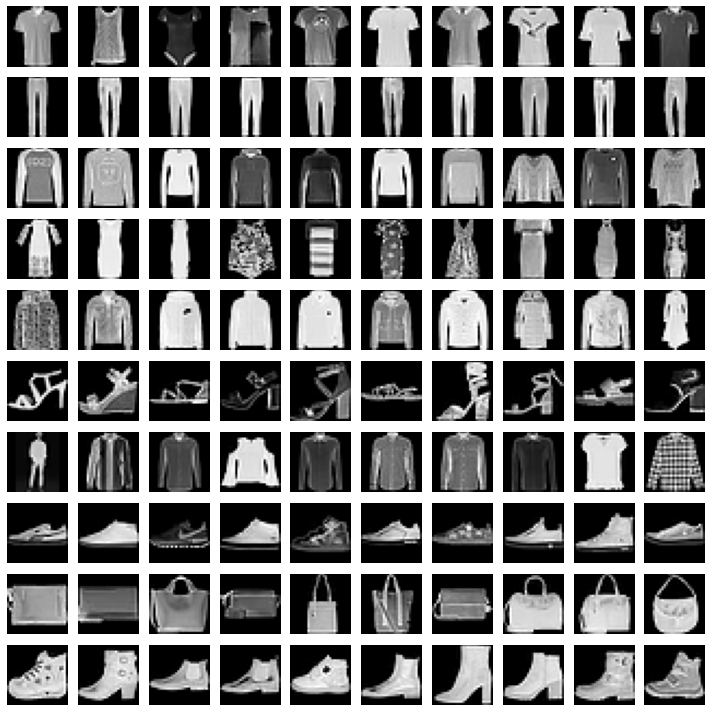

In [291]:
row,column =len(train_targets.unique()),10
fig,ax=plt.subplots(row, column,figsize=(10,10))
for label_class,row_value in enumerate(ax):
  label_x_rows=np.where(train_targets==label_class)[0] #return array of indecies  where the target value (train_img_targets) is equal to label_class which has alength of 1
  print('label_x_rows ', label_x_rows) 

  #Loop through 10 times to fill the columns of a given row.
  for plot_cell in row_value:
    plot_cell.grid(False);plot_cell.axis('off')
    rand_img_idx=np.random.choice(label_x_rows) # From that array pick a single indices for plotting
    x=train_images[rand_img_idx] 
    plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

In [292]:
image, label = train_data[0]
image, label

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -0.6863, -0.5216, -0.6549, -0.4353, -0.6784, -0.7255, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-0.9843, -1.0000, -1.0000, -1.0000, -0.4824,  0.5686,  0.7412,
            0.8588,  0.8745,  0.898

In [293]:
image.shape

torch.Size([1, 28, 28])

In [294]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# **4. Prepare Dataloader**

In [295]:
def load_data(train_data,test_data,batch_size):
    #load train_data  
    train_dataloader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    #load_testdata
    test_dataloader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

    return train_dataloader,test_dataloader

In [296]:
train_dataloader,test_dataloader=load_data(train_data=train_data,test_data=test_data,batch_size=32)
train_dataloader

# **5. Building model**

In [297]:
class FMNIST(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(.5)
    )
    self.layer2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(.25)
    )
    # self.layer3=nn.Sequential(
    #   nn.Conv2d(in_channels=hidden_units,
    #             out_channels=hidden_units,
    #             kernel_size=3,
    #             stride=1,
    #             padding=1),
    #   nn.ReLU(),
    #   nn.Conv2d(in_channels=hidden_units,
    #             out_channels=hidden_units,
    #             kernel_size=3,
    #             stride=1,
    #             padding=1),
    #   nn.ReLU(),
    #   nn.MaxPool2d(2)
    #  )
        
    self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    # x=self.layer3(x)
    x=self.classifier(x)

    return x


In [317]:

model=FMNIST(input_shape=1,hidden_units=15,output_shape=len(class_names)).to(device)
model

FMNIST(
  (layer1): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=735, out_features=10, bias=True)
  )
)

# **6. Training model**

In [318]:
def train_step(model:torch.nn.Module,
          data_loader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          device:torch.device=device):
  model.train()

  train_loss,train_acc=0,0

  for batch,(x,y) in enumerate(data_loader):
    x,y=x.to(device),y.to(device)

    y_pred=model(x)

    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    # train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  train_loss =train_loss/ len(data_loader)
  train_acc =train_acc/ len(data_loader)
  return train_loss, train_acc

In [319]:
def test_step(data_loader:torch.utils.data.DataLoader,
         model:torch.nn.Module,
         loss_fn:torch.nn.Module,
         device:torch.device=device):
  model.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for batch, (x, y) in enumerate(data_loader):
        x,y=x.to(device),y.to(device)

        test_pred=model(x)
        
        loss=loss_fn(test_pred,y)
        test_loss+=loss.item()

        test_pred_labels = test_pred.argmax(dim=1)
        test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


  test_loss=test_loss/len(data_loader)
  test_acc=test_acc/len(data_loader)
  return test_loss, test_acc



In [320]:

from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int,device:torch.device):
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                            data_loader=train_dataloader,
                                            loss_fn=loss_fn,
                                            optimizer=optimizer,
                                            device=device)
      test_loss, test_acc = test_step(model=model,
          data_loader=test_dataloader,
          loss_fn=loss_fn,
          device=device)
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )


      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  return results

In [321]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=.05)

results=train(model=model,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=30,
              device=device
              )

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7604 | train_acc: 0.7236 | test_loss: 0.5071 | test_acc: 0.8374
Epoch: 2 | train_loss: 0.4802 | train_acc: 0.8281 | test_loss: 0.4250 | test_acc: 0.8425
Epoch: 3 | train_loss: 0.4274 | train_acc: 0.8476 | test_loss: 0.3759 | test_acc: 0.8705
Epoch: 4 | train_loss: 0.4012 | train_acc: 0.8551 | test_loss: 0.3603 | test_acc: 0.8717
Epoch: 5 | train_loss: 0.3863 | train_acc: 0.8619 | test_loss: 0.3581 | test_acc: 0.8751
Epoch: 6 | train_loss: 0.3727 | train_acc: 0.8657 | test_loss: 0.3367 | test_acc: 0.8811
Epoch: 7 | train_loss: 0.3667 | train_acc: 0.8686 | test_loss: 0.3376 | test_acc: 0.8803
Epoch: 8 | train_loss: 0.3602 | train_acc: 0.8700 | test_loss: 0.3176 | test_acc: 0.8840
Epoch: 9 | train_loss: 0.3541 | train_acc: 0.8715 | test_loss: 0.3176 | test_acc: 0.8870
Epoch: 10 | train_loss: 0.3491 | train_acc: 0.8754 | test_loss: 0.3216 | test_acc: 0.8843
Epoch: 11 | train_loss: 0.3469 | train_acc: 0.8754 | test_loss: 0.3118 | test_acc: 0.8890
Epoch: 12 | train_l

In [324]:
def plot_loss_curves(results):
  loss=results['train_loss']
  test_loss=results['test_loss']

  accuracy=results['train_acc']
  test_accuracy=results['test_acc']

  epochs=range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  #plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

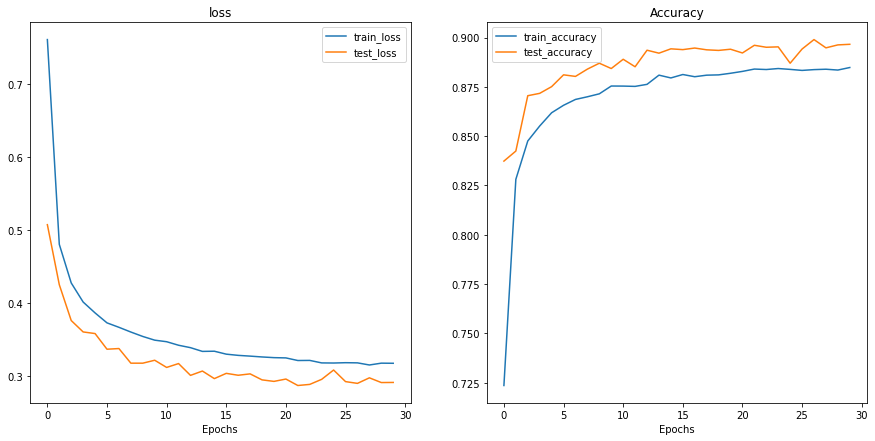

In [325]:
plot_loss_curves(results)

# **7. Make and evaluate predictions**

In [326]:
def make_predictions (model:torch.nn.Module,data:list,device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      pred_logits=model(sample)

      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [327]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [328]:
pred_probs= make_predictions(model=model, 
                             data=test_samples)


pred_probs[:2]

tensor([[2.5558e-06, 1.0835e-07, 2.2571e-09, 6.7519e-08, 8.5741e-10, 9.9938e-01,
         6.0567e-07, 1.3577e-04, 7.6655e-06, 4.7487e-04],
        [4.0630e-02, 4.5315e-01, 9.3362e-04, 7.1090e-02, 3.3992e-01, 5.6561e-06,
         9.3298e-02, 1.0479e-04, 7.8883e-04, 7.7786e-05]])

In [329]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [330]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

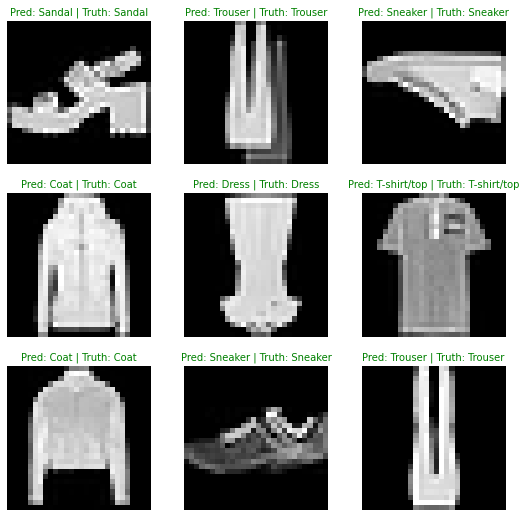

In [331]:
from re import I
#plot predictions 

plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label=class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

# **8. Making a confusion matrix**

In [332]:
from tqdm.auto import tqdm 

y_preds=[]
model.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader, desc="Making predictions"):
    x,y=x.to(device),y.to(device)

    y_logit=model(x)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())
    
    y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [333]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

In [334]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.21.0


In [335]:
from pathlib import Path
def save_model(model:torch.nn.Module,
               target_dir:str,
               model_name:str):
  target_dir_path=Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)
  
  assert model_name.endswith(".pth") or model_name.endswith(".pt")
  model_save_path=target_dir_path /model_name
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [336]:
model_saved=save_model(model,
                       "models",
                       "modelfmnist.pth")

[INFO] Saving model to: models/modelfmnist.pth
